In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Download data from yahoo finance
ticker = 'AAPL'
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2023-11-30')

df = yf.download(ticker, start_date, end_date)

print(f"\nDataFrame Shape: {df.shape}")
print(df.info())
df.head()

[*********************100%%**********************]  1 of 1 completed

DataFrame Shape: (480, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480 entries, 2022-01-03 to 2023-11-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       480 non-null    float64
 1   High       480 non-null    float64
 2   Low        480 non-null    float64
 3   Close      480 non-null    float64
 4   Adj Close  480 non-null    float64
 5   Volume     480 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.2 KB
None


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953903,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.670013,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056992,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225037,86709100


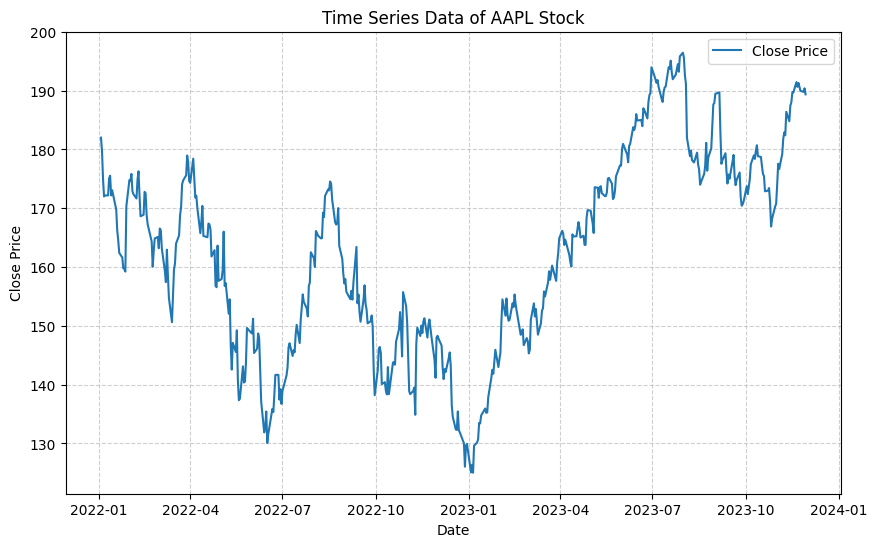

In [3]:
# Plot the close price

plt.figure(figsize=(10,6))

plt.plot(df['Close'], label='Close Price')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Data of AAPL Stock')
plt.legend()
plt.grid(visible=True, alpha=0.6, linestyle='--')

plt.show()

# Plot for thumbnail

In [4]:
df = yf.download(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
# Simple Moving Average
# rolling 5 represents fast ma
# rolling 20 represents a slow ma

df['SMA_20'] = df['Close'].rolling(20).mean()
df['SMA_50'] = df['Close'].rolling(50).mean()

df.dropna(inplace=True)

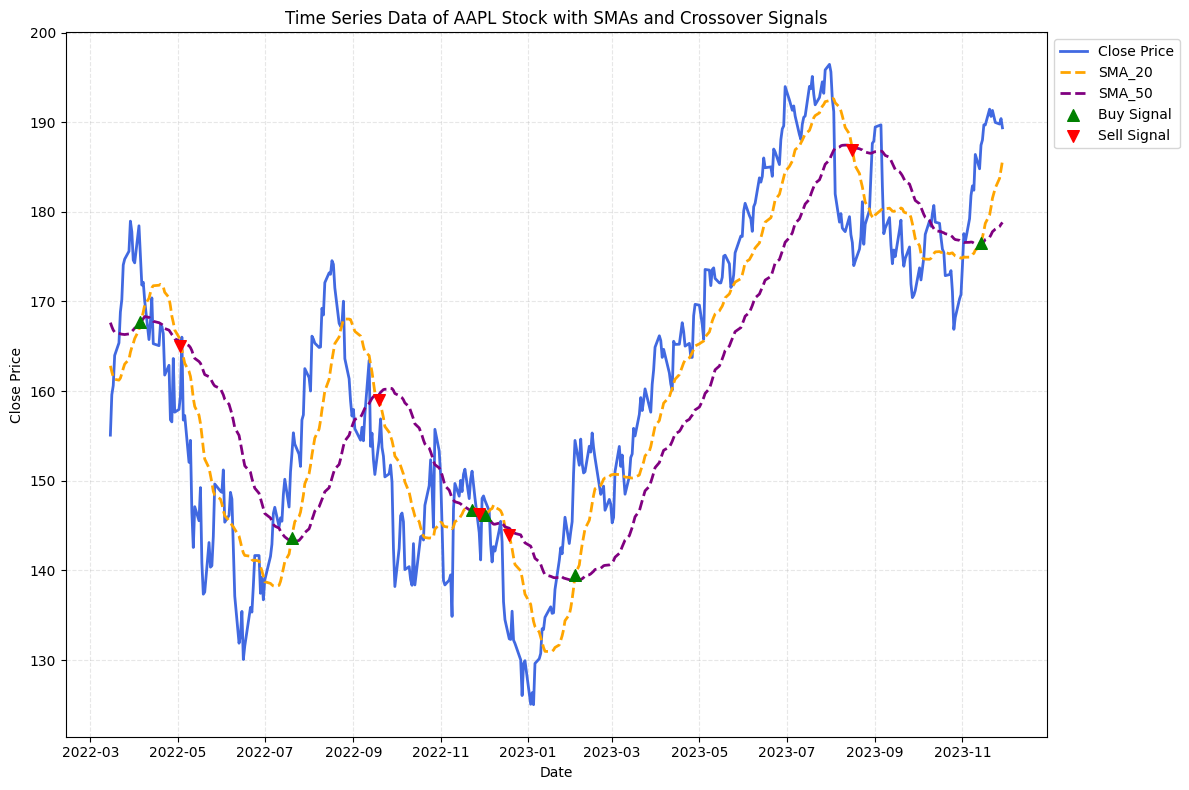

In [6]:
# Plot the chart with the SMAs and crossover markers
plt.figure(figsize=(12, 8))

# Plot Close Price and SMAs
plt.plot(df['Close'], label='Close Price', color='royalblue', linewidth=2)
plt.plot(df['SMA_20'], label='SMA_20', linestyle='--', color='orange', linewidth=2)
plt.plot(df['SMA_50'], label='SMA_50', linestyle='--', color='purple', linewidth=2)

# Identify crossover points
crossover_buy_points = df[(df['SMA_20'] > df['SMA_50']) & (df['SMA_20'].shift(1) < df['SMA_50'].shift(1))]
crossover_sell_points = df[(df['SMA_20'] < df['SMA_50']) & (df['SMA_20'].shift(1) > df['SMA_50'].shift(1))]

# Plot crossover points with enlarged markers
plt.scatter(crossover_buy_points.index, crossover_buy_points['SMA_20'], marker='^', color='green', s=70, label='Buy Signal', zorder=5)
plt.scatter(crossover_sell_points.index, crossover_sell_points['SMA_20'], marker='v', color='red', s=70, label='Sell Signal', zorder=5)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Data of AAPL Stock with SMAs and Crossover Signals')
plt.legend()
plt.grid(visible=True, alpha=0.3, linestyle='--')

# Add a legend outside the plot for clarity
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Types of Moving Averages

## Simple Moving Average (SMA)

In [7]:
df = yf.download(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [8]:
# Simple Moving Average

df['SMA_5'] = df['Close'].rolling(5).mean()
df['SMA_20'] = df['Close'].rolling(20).mean()

df.dropna(inplace=True)

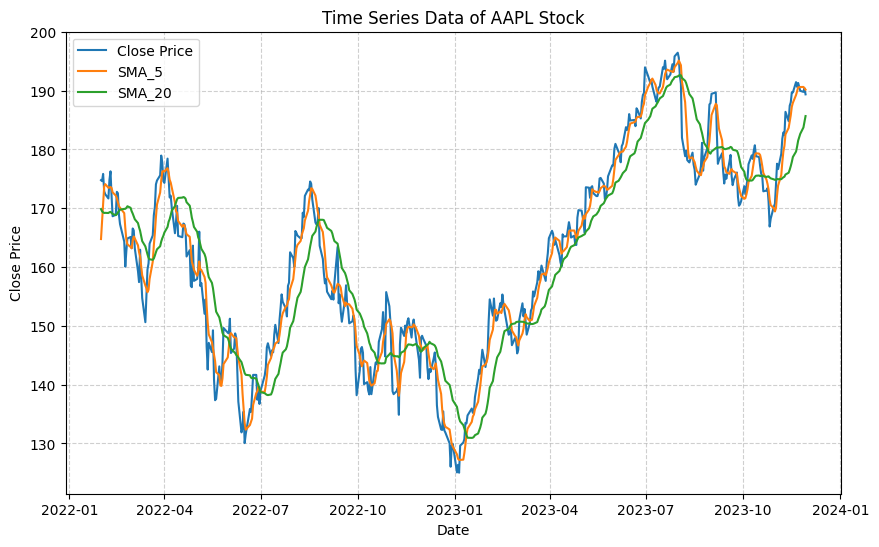

In [9]:
# Plot the chart with the EMAs
plt.figure(figsize=(10,6))

plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_5'], label='SMA_5')
plt.plot(df['SMA_20'], label='SMA_20')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Data of AAPL Stock')
plt.legend()
plt.grid(visible=True, alpha=0.6, linestyle='--')

plt.show()

## Exponential Moving Average (EMA)

In [10]:
df = yf.download(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [11]:
# Exponential Moving Average

df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

df.dropna(inplace=True)

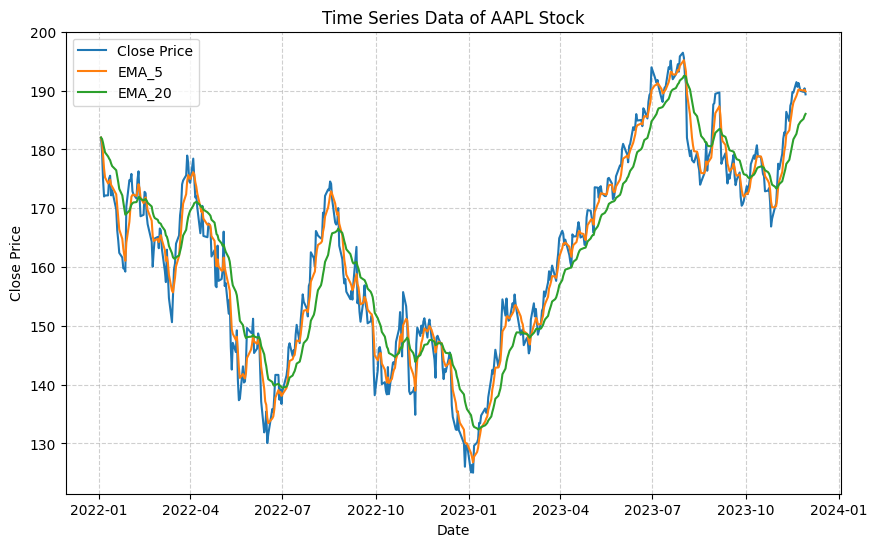

In [12]:
# Plot the chart with the EMAs
plt.figure(figsize=(10,6))

plt.plot(df['Close'], label='Close Price')
plt.plot(df['EMA_5'], label='EMA_5')
plt.plot(df['EMA_20'], label='EMA_20')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Data of AAPL Stock')
plt.legend()
plt.grid(visible=True, alpha=0.6, linestyle='--')

plt.show()

## Weighted Moving Average (WMA)

In [13]:
df = yf.download(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [14]:
# Weighted Moving Average

weights_5 = np.array([1, 2, 3, 4, 5])
weights_20 = np.arange(1, 21, 1)

# Create a rolling window based on the size of the time period.
# Apply the weightage to each data points using dot products
# and divide by total weightage
df['WMA_5'] = df['Close'].rolling(5) \
                .apply(lambda prices: np.dot(prices, weights_5) / weights_5.sum(),\
                raw=True)

df['WMA_20'] = df['Close'].rolling(20) \
                 .apply(lambda prices: np.dot(prices, weights_20) / weights_20.sum(),\
                 raw=True)

df.dropna(inplace=True)

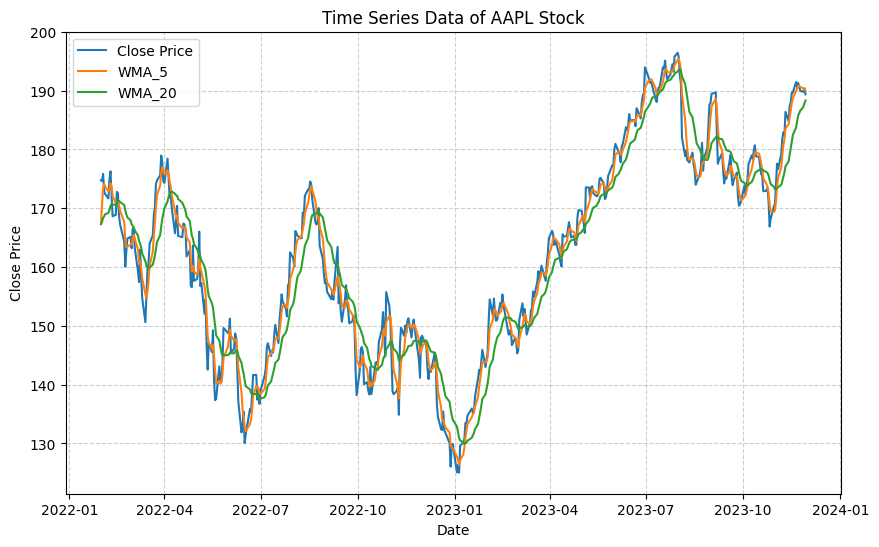

In [15]:
# Plot the chart with the WMAs
plt.figure(figsize=(10,6))

plt.plot(df['Close'], label='Close Price')
plt.plot(df['WMA_5'], label='WMA_5')
plt.plot(df['WMA_20'], label='WMA_20')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Data of AAPL Stock')
plt.legend()
plt.grid(visible=True, alpha=0.6, linestyle='--')

plt.show()

# Trading Simulation

In [16]:
# Download data
df = yf.download(ticker, start_date, end_date)

# Create SMA
df['SMA_5'] = df['Close'].rolling(5).mean()
df['SMA_20'] = df['Close'].rolling(20).mean()

df.dropna(inplace=True)

# Determine trade actions based on SMA crossover
df['TradeAction'] = np.where(df['SMA_5'] > df['SMA_20'], 'Buy', 'Sell')

# Calculate profits based on trade actions
# If 'Buy'  = 'Close' - 'Open'
# If 'Sell' = 'Open' - 'Close'
df['Profit'] = np.where(df['TradeAction'] == 'Buy', (df['Close'] - df['Open']),\
                (df['Open'] - df['Close']))

# Calculate cumulative profits
df['CumulativeProfit'] = df['Profit'].cumsum()

[*********************100%%**********************]  1 of 1 completed


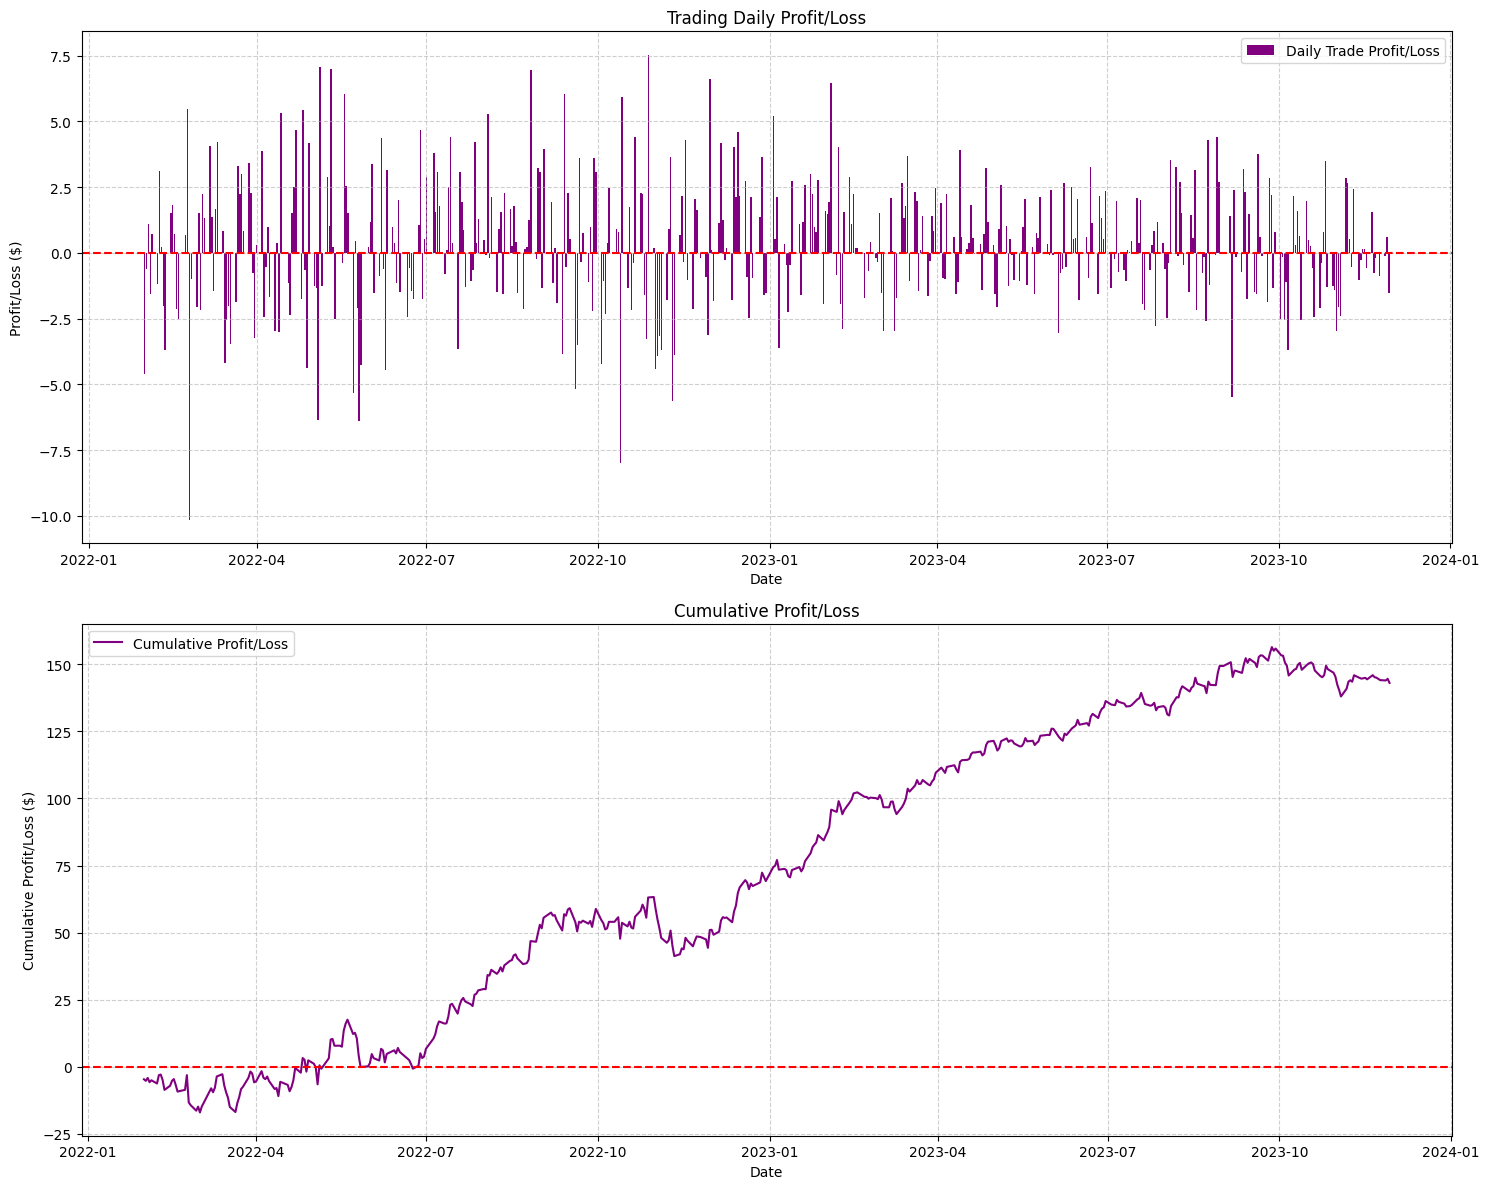

In [17]:
# Plot the profit/loss

plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
plt.bar(df.index, df['Profit'], label='Daily Trade Profit/Loss', color='purple')
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Trading Daily Profit/Loss')
plt.xlabel('Date')
plt.ylabel('Profit/Loss ($)')
plt.grid(visible=True, alpha=0.6, linestyle='--')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index, df['CumulativeProfit'], label='Cumulative Profit/Loss', color='purple')
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Cumulative Profit/Loss')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit/Loss ($)')
plt.grid(visible=True, alpha=0.6, linestyle='--')
plt.legend()

plt.grid(visible=True, alpha=0.6, linestyle='--')
plt.tight_layout()
plt.legend()
plt.show()

In [18]:
# Evaluate with trading performance metrics
net_profit = df['CumulativeProfit'].iloc[-1]

# Calculate winning and losing trades
winning_trades = df[df['Profit'] > 0]
losing_trades = df[df['Profit'] < 0]

# Calculate wining and losing percentages
winning_percentage = len(winning_trades) / len(df) * 100
losing_percentage = len(losing_trades) / len(df) * 100

# Calculate average win and average loss
average_win = winning_trades['Profit'].mean()
average_loss = losing_trades['Profit'].mean()
risk_reward_ratio = abs(average_win / average_loss) if average_loss != 0 else float('inf')

# Calculate Sharpe ratio (assuming risk-free rate is 0)
daily_returns = df['CumulativeProfit'].pct_change()
sharpe_ratio = (daily_returns.mean() / daily_returns.std())

# Calculate maximum drawdown
df['RollingMax'] = df['CumulativeProfit'].cummax()
df['MaxDrawdown'] = df['CumulativeProfit'] - df['RollingMax']
df['MaxDrawdown_Percentage'] = df['MaxDrawdown'] / df['RollingMax']

max_drawdown = df['MaxDrawdown'].min()
row_md = df[df['MaxDrawdown'] == max_drawdown].index.max()
max_drawdown_percentage = df.loc[row_md, 'MaxDrawdown_Percentage'] * 100

In [19]:
print(f"Net Profit: \t\t\t${net_profit:.2f}")
print(f"Winning Percentage: \t\t{winning_percentage:.2f}%")
print(f"Losing Percentage: \t\t{losing_percentage:.2f}%")
print(f"Average Win: \t\t\t${average_win:.2f}")
print(f"Average Loss: \t\t\t${abs(average_loss):.2f}")
print(f"Risk-Reward Ratio: \t\t{risk_reward_ratio:.2f}")
print(f"Sharpe Ratio: \t\t\t{sharpe_ratio:.2f}")
print(f"Max Drawdown: \t\t\t${max_drawdown:.2f}")
print(f"Max Drawdown Percentage: \t{max_drawdown_percentage:.2f}%")

Net Profit: 			$143.02
Winning Percentage: 		55.53%
Losing Percentage: 		44.25%
Average Win: 			$1.97
Average Loss: 			$1.77
Risk-Reward Ratio: 		1.11
Sharpe Ratio: 			0.06
Max Drawdown: 			$-22.02
Max Drawdown Percentage: 	-34.80%
